<a href="https://colab.research.google.com/github/Mayank0414/Face-Detection-using-OpenCV-and-FaceNet-on-python/blob/main/projectt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mtcnn opencv-python tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 793.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 115.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 168.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.3 MB/s eta 0:00:00


In [ ]:
import cv2 as cv
import os
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [ ]:
img =cv.imread("/content/drive/MyDrive/dataset/image_dataset_smaller/Virat_Kohli/images - 2020-12-16T132743.834.jpg")
#open cv bgr channel format and plt reads images as rgb channel format

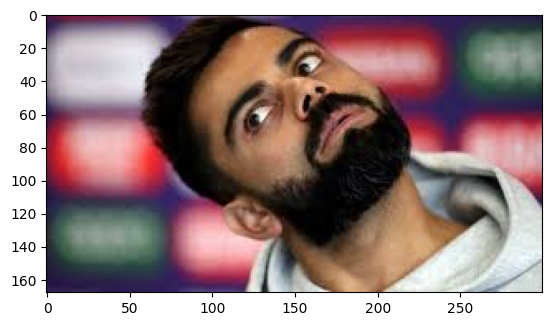

In [ ]:
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)#convert bgr to rgb
plt.imshow(img)#rgb image

In [ ]:
from mtcnn.mtcnn import MTCNN
detector =MTCNN()#also uses rgb
results=detector.detect_faces(img)

In [ ]:
x,y,w,h=results[0]['box']


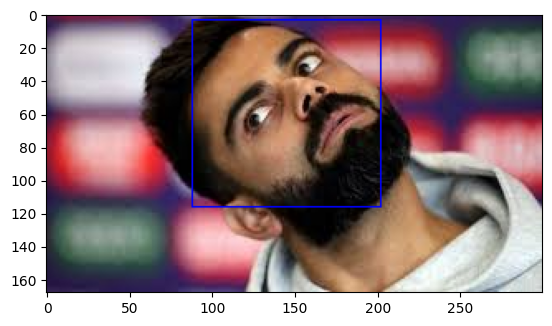

In [ ]:
img=cv.rectangle(img,(x,y),(x+w,y+h),(0,0,255),1)
plt.imshow(img)

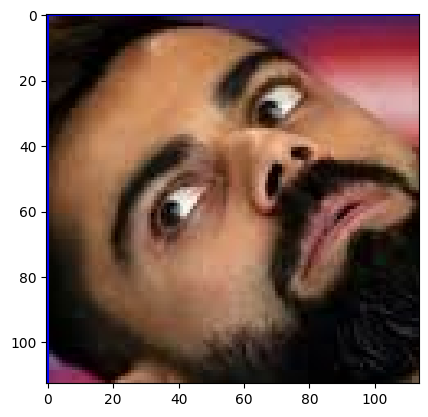

In [ ]:
my_face=img[y:y+h,x:x+w]
#facenet takes as input 160*160 image
plt.imshow(my_face)

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [ 66,  45,  60],
        [ 56,  36,  47],
        ...,
        [ 79,  35,  84],
        [ 79,  35,  84],
        [ 79,  35,  84]],

       [[  0,   0, 255],
        [ 53,  34,  38],
        [ 50,  32,  32],
        ...,
        [ 85,  32,  78],
        [ 85,  32,  78],
        [ 85,  32,  78]],

       ...,

       [[  0,   0, 255],
        [124,  47, 101],
        [132,  49, 103],
        ...,
        [ 29,  19,   7],
        [ 51,  38,  22],
        [ 70,  53,  35]],

       [[  0,   0, 255],
        [126,  48,  98],
        [134,  50, 100],
        ...,
        [ 45,  33,  21],
        [ 94,  78,  63],
        [101,  82,  65]],

       [[  0,   0, 255],
        [133,  51,  99],
        [139,  53, 100],
        ...,
        [ 63,  51,  37],
        [100,  84,  69],
        [106,  87,  70]]], dtype=uint8)
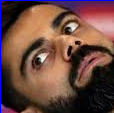

In [ ]:
my_face

<h1>
Automating the preprocessing


In [ ]:
import numpy as np
import cv2 as cv
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

class FACELOADING:
  def __init__(self,directory):
    self.directory=directory
    self.target_size=(160,160)
    self.X=[]
    self.Y=[]
    self.detector = MTCNN()
  def extract_face(self,filename):
    img=cv.imread(filename)
    img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    x,y,w,h=self.detector.detect_faces(img)[0]['box']
    x,y=abs(x),abs(y)
    face=img[y:y+h,x:x+w]
    face_arr=cv.resize(face,self.target_size)
    return face_arr
  def load_faces(self,dir):
    Faces=[]
    for im_name in os.listdir(dir):

      try:
        path=dir+im_name
        single_face=self.extract_face(path)
        Faces.append(single_face)
      except Exception as e:
        pass
    return Faces
  def load_classes(self):
    for sub_dir in os.listdir(self.directory):
      path=self.directory+'/'+sub_dir+'/'
      faces=self.load_faces(path)
      labels=[sub_dir for _ in range(len(faces))]
      print('loaded {} images for {}'.format(len(faces),sub_dir))
      self.X.extend(faces)
      self.Y.extend(labels)
    return np.asarray(self.X),np.asarray(self.Y)


  def plot_images(self):
    for nums,image in enumerate(self.X):
      ncols=3
      nrows=len(self.Y)//ncols+1
      plt.subplot(nrows,ncols,nums+1)
      plt.imshow(image)
      plt.axis('off')

In [ ]:
faceloading=FACELOADING("/content/drive/MyDrive/dataset/image_dataset_smaller")
X,Y=faceloading.load_classes()

loaded 24 images for Barack_Obama
loaded 24 images for Bill_Gates
loaded 22 images for Narendra_Modi
loaded 19 images for Dalai_Lama
loaded 24 images for Sundar_Pichai
loaded 23 images for Virat_Kohli
loaded 23 images for Vikas_Khanna


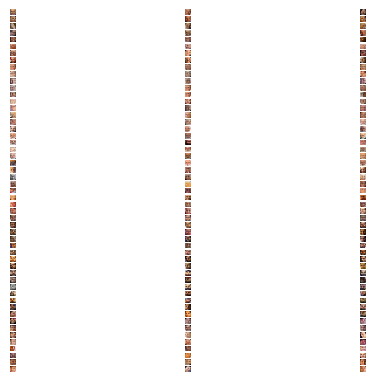

In [ ]:
faceloading.plot_images()

Facenet PART


In [ ]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=9a66a1998873bcf76ef3a2f117c195772d9fee1e7282024b4b5789f222ec3031
  Stored in directory: /root/.cache/pip/wheels/05/b0/f5/19ac49fedc10b1df3ee56b096edbcfa39d45794fccc6bcdbbf
Successfully built keras-facenet


In [ ]:
from keras_facenet import FaceNet
embedder=FaceNet()

def get_embedding(face_img):
  face_img=face_img.astype('float32')
  face_img=np.expand_dims(face_img,axis=0)
  yhat=embedder.embeddings(face_img)
  return yhat[0] #512D image(1*1*512)




In [ ]:
EMBEDDED_X=[]
for img in X:
  EMBEDDED_X.append(get_embedding(img))
EMBEDDED_X=np.asarray(EMBEDDED_X)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━

In [ ]:
np.savez_compressed('faces_embeddings_done_4classes.npz',EMBEDDED_X,Y)